In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dirty_iris = pd.read_csv('iris_dirty.csv')
print(dirty_iris)

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           NaN          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           NaN          3.0           5.1          1.8   

       Species  
0       Setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [2]:
# i) Calculate the number and percentage of complete observations
complete_obs = dirty_iris.dropna()
num_complete_obs = len(complete_obs)
total_obs = len(dirty_iris)
percentage_complete = (num_complete_obs / total_obs) * 100

print(f"Number of complete observations: {num_complete_obs}")
print(f"Percentage of complete observations: {percentage_complete:.2f}%")



Number of complete observations: 131
Percentage of complete observations: 87.33%


In [3]:
# ii) Replace all special values in the data with NA
print(dirty_iris['Sepal.Length'].unique())

[5.1 4.9 4.7 4.6 nan 5.4 5.  4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4
 6.9 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


In [4]:
print(dirty_iris['Sepal.Width'].unique())

[3.5 3.  3.2 3.1 3.6 nan 3.4 2.9 3.7 4.  4.4 3.9 3.8 3.3 4.1 4.2 2.3 2.8
 2.4 2.7 2.  2.2 2.5 2.6]


In [5]:
print(dirty_iris['Petal.Width'].unique())

[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


In [6]:
print(dirty_iris['Petal.Length'].unique())


[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]


In [7]:
print(dirty_iris['Species'].unique())

['Setosa' 'setosa' 'SETOSA' 'versicolor' 'Versicolor' 'VERSICOLOR'
 'virginica' 'VIRGINICA']


In [8]:
special_values = ['nan','inf']
dirty_iris.replace(special_values, np.nan, inplace=True)
print(dirty_iris)


     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  \
0             1           5.1          3.5           1.4          0.2   
1             2           4.9          3.0           1.4          0.2   
2             3           4.7          3.2           1.3          0.2   
3             4           4.6          3.1           1.5          0.2   
4             5           NaN          3.6           1.4          0.2   
..          ...           ...          ...           ...          ...   
145         146           6.7          3.0           5.2          2.3   
146         147           6.3          2.5           5.0          1.9   
147         148           6.5          3.0           5.2          2.0   
148         149           6.2          3.4           5.4          2.3   
149         150           NaN          3.0           5.1          1.8   

       Species  
0       Setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145 

In [9]:
# iii) Define rules
def check_rules(df):
    species_violations = (~df['Species'].isin(['setosa', 'versicolor', 'virginica'])).sum()
    
    numerical_properties_violations = (df.select_dtypes(include=[np.number]) < 0).sum().sum()

    petal_length_violations = (df['Petal.Length'] < 2 * df['Petal.Width']).sum()

    sepal_length_violations = (df['Sepal.Length'] > 30).sum()

    sepal_petal_relationship_violations = (df['Sepal.Length'] <= df['Petal.Length']).sum()

    violations = {
        "Species": species_violations,
        "Numerical Properties": numerical_properties_violations,
        "Petal Length": petal_length_violations,
        "Sepal Length": sepal_length_violations,
        "Sepal-Petal Relationship": sepal_petal_relationship_violations
    }

    return violations


# iv) Determine how often each rule is broken
violations = check_rules(dirty_iris)
print("Number of violations for each rule:")
for rule, count in violations.items():
    print(f"{rule}: {count}")

    

Number of violations for each rule:
Species: 5
Numerical Properties: 0
Petal Length: 0
Sepal Length: 0
Sepal-Petal Relationship: 0


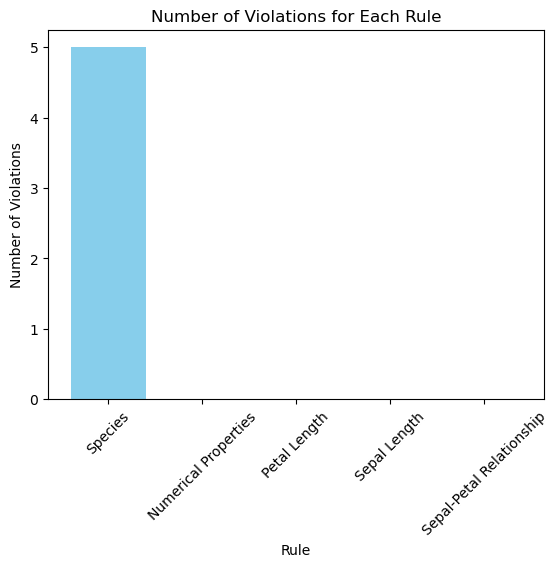

In [10]:
# Summarize and plot the results of applying the ruleset
plt.bar(violations.keys(), violations.values(), color='skyblue')
plt.title('Number of Violations for Each Rule')
plt.xlabel('Rule')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.show()



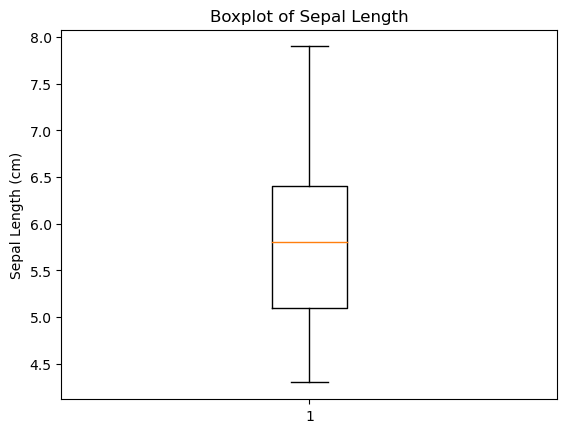

In [11]:
# v) Find outliers in sepal length using boxplot
plt.boxplot(dirty_iris['Sepal.Length'].dropna())
plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length (cm)')
plt.show()